# Phys427 A#3
### Sarah Clapoff, v00886385
#### Feb 5, 2023

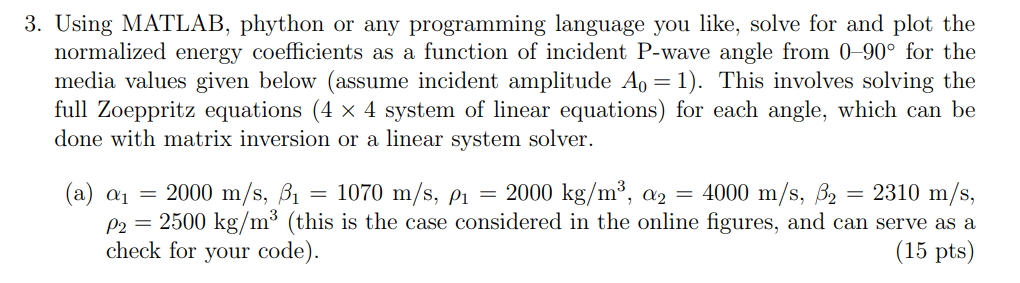

In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

In [2]:
def E_coeff(theta1):
    #do this for each incident angle theta1
    #get reflection and transmission angles from snells law:
    theta2 = cmath.asin(a2*np.sin(theta1)/a1)
    delta1 = cmath.asin(b1*np.sin(theta1)/a1)
    delta2 = cmath.asin(b2*np.sin(theta1)/a1)

    #then solve ZE system of eq. to get A1,B1,A2,B2 (reflection and transmission amps):

    #LHS of ZE
    ZE_LHS = np.array([[cmath.cos(theta1), -cmath.sin(delta1), cmath.cos(theta2), cmath.sin(delta2)],
                        [cmath.sin(theta1), cmath.cos(delta1), -cmath.sin(theta2), cmath.cos(delta2)],
                        [rho1*a1*cmath.cos(2*delta1), -rho1*b1*cmath.sin(2*delta1), -rho2*a2*cmath.cos(2*delta2), -rho2*b2*cmath.sin(2*delta2)],
                        [(b1/a1)*rho1*b1*cmath.sin(2*theta1), rho1*b1*cmath.cos(2*delta1), (b2/a2)*rho2*b2*cmath.sin(2*theta2), -rho2*b2*cmath.cos(2*delta2)]
                        ])
    #RHS of ZE (note A0=1, but we'll include it here for generality)
    ZE_RHS = A0 * np.array([cmath.cos(theta1), -cmath.sin(theta1), -rho1*a1*cmath.cos(2*delta1), b1/a1*rho1*b1*cmath.sin(2*theta1)])

    #solving the ZE equations:
    A1,B1,A2,B2 = np.linalg.solve(ZE_LHS, ZE_RHS)
    #get magnitude of reflection and transmission coeffs
    Rp = A1/A0
    Rs = B1/A0
    Tp = A2/A0
    Ts = B2/A0
    #calculate normalized energy coefs 
    Erp = abs(Rp)**2 
    Ers = b1*np.cos(delta1)*abs(Rs)**2/(a1*np.cos(theta1))
    Etp = rho2*a2*np.cos(theta2)/(rho1*a1*np.cos(theta1))*abs(Tp)**2
    Ets = rho2*b2*np.cos(delta2)/(rho1*a1*np.cos(theta1))*abs(Ts)**2


    #if(np.round(Erp+Ers+Etp+Ets,10) != 1): print("uh oh")

    return [Erp.real,Ers.real,Etp.real,Ets.real]


In [3]:
def plotting(Erp,Ers,Etp,Ets):
    #change theta1 to degrees
    theta1_plot = np.linspace(0,90,500)
    #plot

    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1)#, sharex=True)
    fig.subplots_adjust(hspace=0.5) #add space b/w plots
    plt.setp((ax1,ax2,ax3,ax4), xticks=np.arange(0,91,10), yticks=[0,0.5,1.0]) #set x- and y-axis ticks
    ax1.set_title('Energy coefficients as function of Incident P-Wave Angle')
    ax1.plot(theta1_plot, Erp, 'black', linewidth='.75')
    ax1.set_ylabel('$E_{rp}$')
    ax1.set_ylim([0,1])
    ax1.set_xlim([0,90])

    ax2.plot(theta1_plot, Ers, 'black', linewidth='.75')
    ax2.set_ylabel('$E_{rs}$')
    ax2.set_ylim([0,1])
    ax2.set_xlim([0,90])

    ax3.plot(theta1_plot, Etp, 'black', linewidth='.75')
    ax3.set_ylabel('$E_{tp}$')
    ax3.set_ylim([0,1])
    ax3.set_xlim([0,90])

    ax4.plot(theta1_plot, Ets, 'black', linewidth='.75')
    ax4.set_ylabel('$E_{ts}$')
    ax4.set_xlabel('Incident P-wave Angle ($^{\circ})$)')
    ax4.set_ylim([0,1])
    ax4.set_xlim([0,90])


    plt.show()

PART a: alpha_1=2000m/s, beta_1=1070m/s, rho_1=2000kg/m^3, alpha_2=4000m/s, beta_2=2310m/s, rho_2=2500kg/m^3 


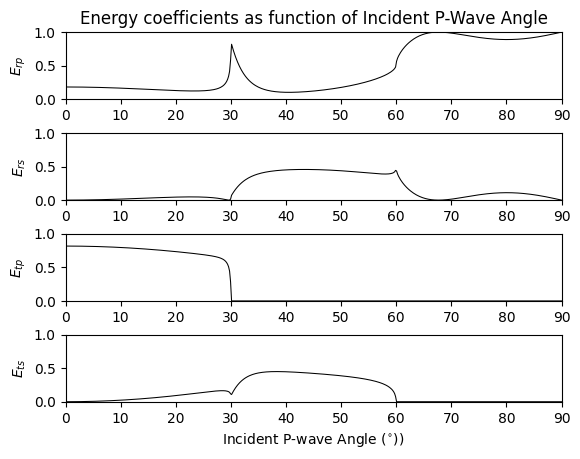

In [4]:
#part a:
#Set up variables
a1, b1, rho1, a2, b2, rho2 = 2000, 1070, 2000, 4000, 2310, 2500
theta1 = np.linspace(0,np.pi/2,500) #this is incident angle of incoming p-wave
A0 = 1

#Get list of E coeffs for each angle
E_coeffs = np.array([E_coeff(i) for i in theta1]).T
Erp,Ers,Etp,Ets = np.split(E_coeffs, 4)
#and fix sizing
Erp=Erp.T
Ers=Ers.T
Etp=Etp.T
Ets=Ets.T

#plot:
print('PART a: alpha_1=2000m/s, beta_1=1070m/s, rho_1=2000kg/m^3, alpha_2=4000m/s, beta_2=2310m/s, rho_2=2500kg/m^3 ')
plotting(Erp,Ers,Etp,Ets)

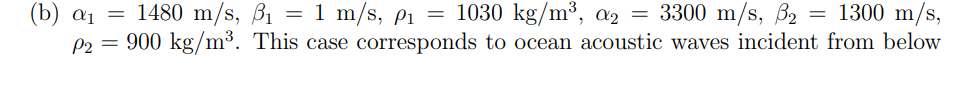

PART b: alpha_1=1480m/s, beta_1=1m/s, rho_1=1030kg/m^3, alpha_2=33000m/s, beta_2=1300m/s, rho_2=900kg/m^3 


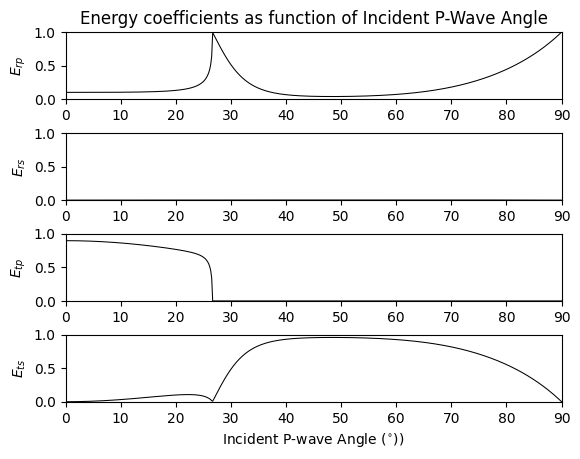

In [6]:
#same as above, but with new values:
#part b:
a1, b1, rho1, a2, b2, rho2 = 1480, 1, 1030, 3300, 1300, 900
#same theta1 and A0

#Get list of E coeffs for each angle
E_coeffs = np.array([E_coeff(i) for i in theta1]).T
Erp,Ers,Etp,Ets = np.split(E_coeffs, 4)
#and fix sizing
Erp=Erp.T
Ers=Ers.T
Etp=Etp.T
Ets=Ets.T

#plot:
print('PART b: alpha_1=1480m/s, beta_1=1m/s, rho_1=1030kg/m^3, alpha_2=33000m/s, beta_2=1300m/s, rho_2=900kg/m^3 ')

plotting(Erp,Ers,Etp,Ets)